In [14]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

# Data Cleaning

In [15]:
df = pd.read_csv("Carseats data_JWHT.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [16]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [17]:
def print_unique(df, cols):
    for col in cols:
        print(f"{col}: {df[col].unique()}")

binary_cols = ["Urban", "US"]
print_unique(df, binary_cols)

Urban: ['Yes' 'No']
US: ['Yes' 'No']


In [18]:
df[binary_cols] = df[binary_cols] == "Yes"
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,True,True
1,11.22,111,48,16,260,83,Good,65,10,True,True
2,10.06,113,35,10,269,80,Medium,59,12,True,True
3,7.40,117,100,4,466,97,Medium,55,14,True,True
4,4.15,141,64,3,340,128,Bad,38,13,True,False
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,True,True
396,6.14,139,23,3,37,120,Medium,55,11,False,True
397,7.41,162,26,12,368,159,Medium,40,18,True,True
398,5.94,100,79,7,284,95,Bad,50,12,True,True


In [19]:
dummy_cols = ["ShelveLoc"]
print_unique(df, dummy_cols)

ShelveLoc: ['Bad' 'Good' 'Medium']


In [21]:
# df[dummy_cols].pipe(pd.get_dummies, drop_first=True)
pd.get_dummies(df[dummy_cols], drop_first=True)

,ShelveLoc_Good,ShelveLoc_Medium
0,False,False
1,True,False
2,False,True
3,False,True
4,False,False
...,...,...
395,True,False
396,False,True
397,False,True
398,False,False


In [22]:
df = pd.concat([df.drop(dummy_cols, axis=1), 
                df[dummy_cols].pipe(pd.get_dummies, drop_first=True)], axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,True,True,False,False
1,11.22,111,48,16,260,83,65,10,True,True,True,False
2,10.06,113,35,10,269,80,59,12,True,True,False,True
3,7.40,117,100,4,466,97,55,14,True,True,False,True
4,4.15,141,64,3,340,128,38,13,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,True,True,True,False
396,6.14,139,23,3,37,120,55,11,False,True,False,True
397,7.41,162,26,12,368,159,40,18,True,True,False,True
398,5.94,100,79,7,284,95,50,12,True,True,False,False


In [23]:
df.dtypes

Sales               float64
CompPrice             int64
Income                int64
Advertising           int64
Population            int64
Price                 int64
Age                   int64
Education             int64
Urban                  bool
US                     bool
ShelveLoc_Good         bool
ShelveLoc_Medium       bool
dtype: object

# Part 1

In [24]:
# a
target = "Sales"
feature_names = df.drop(target, axis=1).columns

# From now on, our data is JUST NUMBERS
X = df.drop(target, axis=1).astype(int).values
# why is it better to convert from a DataFrame rather than a Series?
y = df[target].astype(float).values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

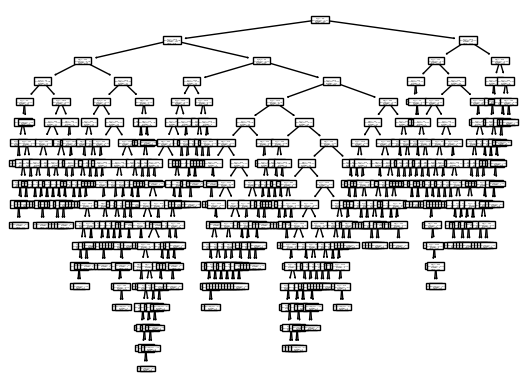

In [29]:
# b
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
_ = plot_tree(dtree) # yikes, hard pass

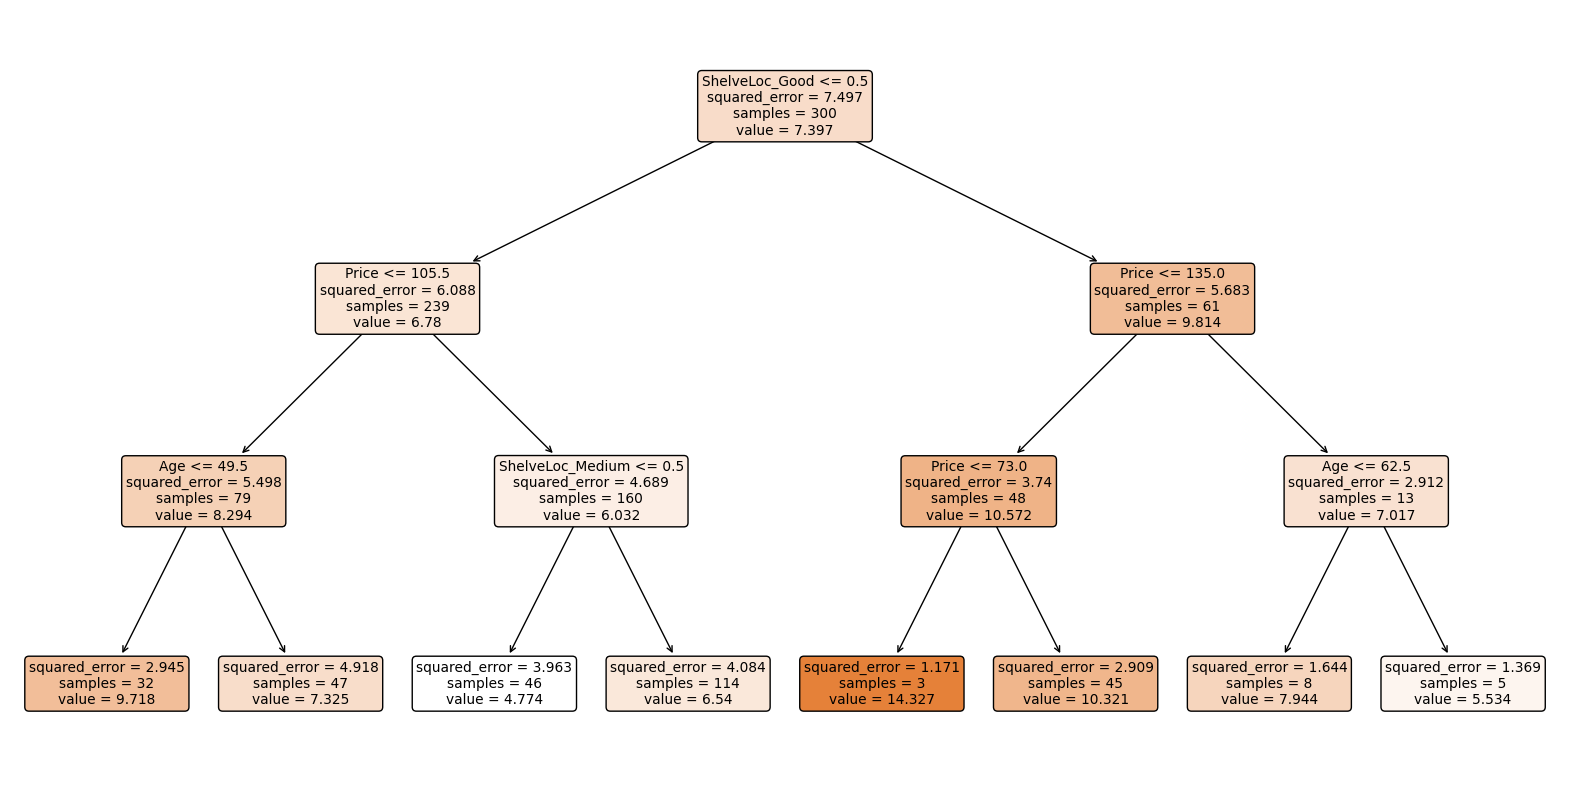

In [30]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X_train, y_train)
_ = plot_tree(dtree, 
              feature_names=feature_names,
              class_names=df[target].unique(),
              filled=True, rounded=True)

In [31]:
# It's cool to see that we're _actually_ making predictions
# But why are we using `predict` rather than `transform`?
# https://stackoverflow.com/questions/62239470/what-is-the-difference-between-sklearns-transform-and-predict-methods
dtree.predict(X_test)

array([ 7.32510638,  4.77369565, 10.32133333,  4.77369565,  7.32510638,
        4.77369565, 10.32133333,  7.32510638, 10.32133333, 10.32133333,
        6.54026316,  7.32510638,  7.32510638,  6.54026316,  5.534     ,
        7.32510638,  7.94375   , 10.32133333,  6.54026316,  6.54026316,
        7.32510638,  6.54026316,  4.77369565,  6.54026316,  4.77369565,
        6.54026316,  6.54026316,  9.7175    ,  6.54026316,  6.54026316,
       10.32133333, 10.32133333,  6.54026316,  4.77369565, 10.32133333,
        6.54026316,  4.77369565,  6.54026316, 10.32133333,  4.77369565,
        4.77369565,  6.54026316,  7.32510638, 10.32133333,  7.94375   ,
        6.54026316,  7.32510638,  7.32510638,  6.54026316,  6.54026316,
        9.7175    ,  9.7175    ,  9.7175    , 10.32133333,  6.54026316,
        4.77369565,  6.54026316, 10.32133333, 10.32133333, 10.32133333,
       10.32133333, 10.32133333,  7.32510638,  6.54026316,  6.54026316,
        6.54026316, 10.32133333,  9.7175    ,  4.77369565, 10.32

In [32]:
mean_squared_error(y_test, dtree.predict(X_test))

5.021884513321162

In [33]:
# c
# Got the right scoring string from:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# It is the negative MSE, as the sklearn routine maximizes the scoring (it is accuracy by default)

def mse_gs_cv(model, params, X, y):
    grid_search = GridSearchCV(model, params, scoring="neg_mean_squared_error")
    grid_search.fit(X, y)
    res = grid_search.cv_results_
    return pd.DataFrame(
        {p_name: res[f"param_{p_name}"].data for p_name in params.keys()}
        | {"score": res["mean_test_score"]}
    )

mse_gs_cv(dtree, {"max_depth": range(1, 14, 2)}, X, y)

,max_depth,score
0,1,-6.003311
1,3,-5.114911
2,5,-4.920785
3,7,-4.722672
4,9,-5.082110
5,11,-5.173096
6,13,-5.307049


In [34]:
# d
rforest = RandomForestRegressor(max_depth=2)
rforest.fit(X_train, y_train)
mean_squared_error(y_test, rforest.predict(X_test))

4.6763162346659835

<BarContainer object of 11 artists>

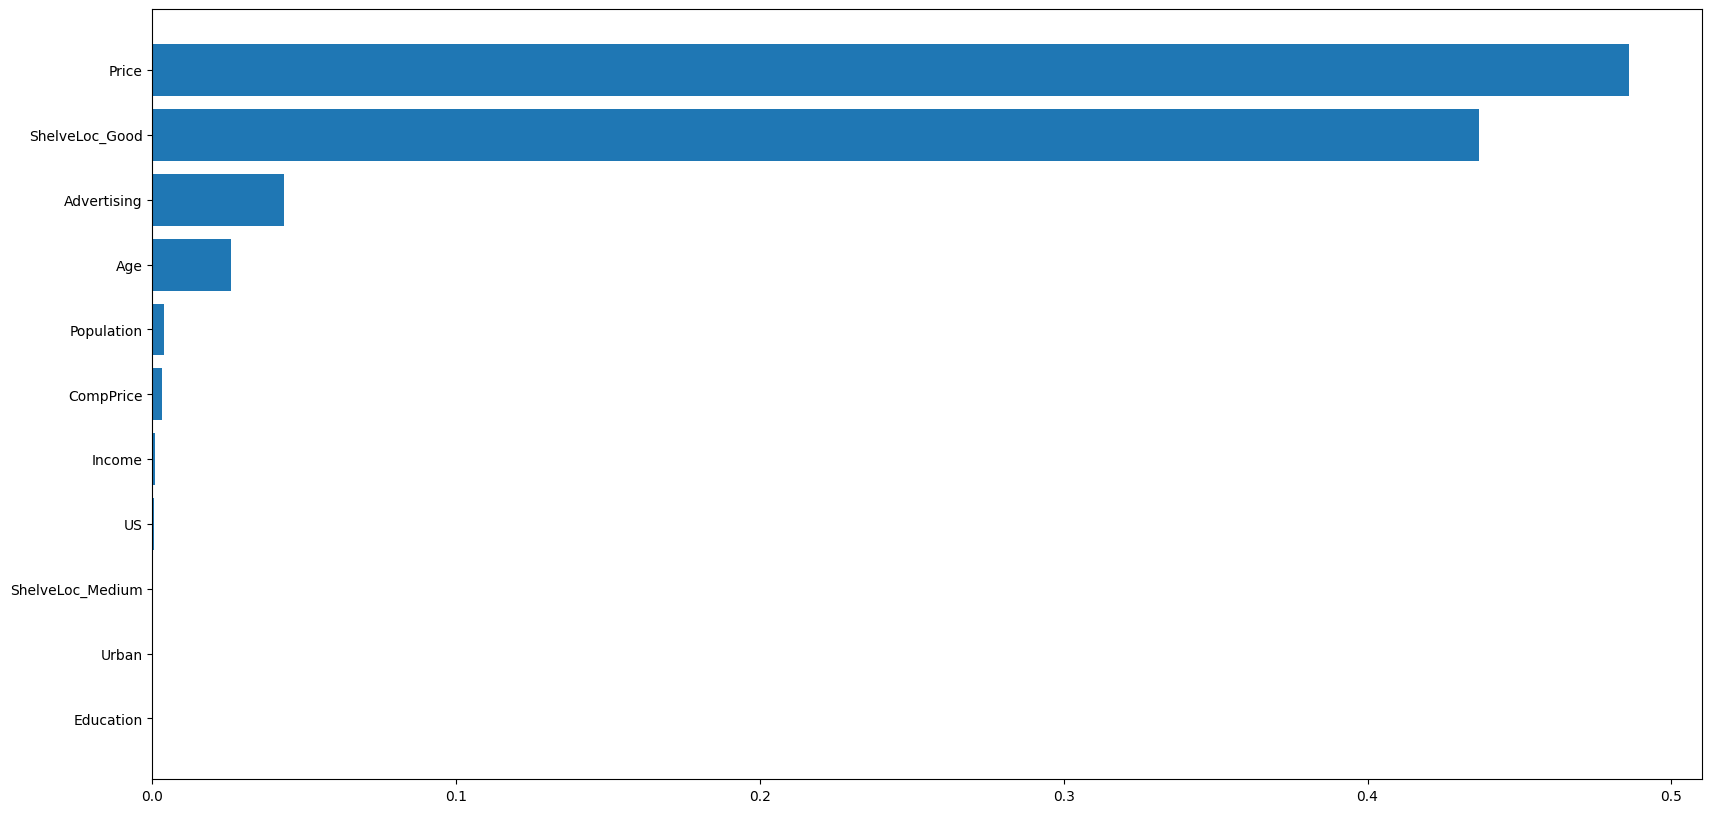

In [17]:
# Why use loops when you can use iterators?
snames, simportances = zip(*sorted(zip(feature_names, rforest.feature_importances_), 
                                   key=lambda pair: pair[1]))
plt.barh(snames, simportances)

In [35]:
mse_gs_cv(rforest, {"max_features": np.arange(1,11)*0.1}, X, y)

,max_features,score
0,0.1,-6.697930
1,0.2,-5.926696
2,0.3,-5.402085
3,0.4,-5.029839
4,0.5,-4.823048
5,0.6,-4.676753
6,0.7,-4.636692
7,0.8,-4.626336
8,0.9,-4.676806
9,1.0,-4.711772


# Part 2

Dataset: 
- $ X \in \mathcal{X} $
- $ y \in \{red, green\} $

Process:
1. Bootstrap ten samples $ \{ (X_i, y_i) \}_{i=1}^{10} $
2. Train ten classification trees on each of the ten samples. Yields $ \{ \theta_i \}_{i=1}^{10} $
3. Predict the probability of $y=red$ for each of the ten trees, given some $X$.

Results:
$$ \{ P_{\theta_i}(y=red|X) \}_{i=1}^{10} = \{ 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75 \} $$

Question: What would be the ensemble prediction using the following strategies:
1. Majority vote
2. Average prediction

In [36]:
probs = np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])

In [37]:
# Majority vote
votes = np.mean(probs >= 0.5) 
decision = votes >= 0.5
votes, decision

(0.6, True)

In [38]:
# Average prediction
average = np.mean(probs) 
decision = average >= 0.5
average, decision

(0.45, False)